#Project Description
#This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). In this notebook we are going to predict wheather a person is above 50 k using various features.

# Load Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#import dataset

In [2]:
df=pd.read_csv("Census income.csv")

# descriptive analysis 

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


#shape of the dataset

In [5]:
df.shape

(32560, 15)

#features of dataset 

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
# feature data type
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

#check null values

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

#There is no null values in the above dataset

In [9]:
# Statistical summary

df.describe(include="all")

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [10]:
df.nunique().to_frame("unique values")

,unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [11]:
# Checking the counts of label categories

Income = df['Income'].value_counts(normalize=True)
round(Income * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: Income, dtype: object

In [12]:
df["Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [13]:
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [14]:
df["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [15]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

#checking skewness ,we  found in Education_num 

In [16]:
#corelation between Numerical value

dfcor=df.corr()
dfcor

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


In [17]:
np.mean(df["Capital_gain"])

1077.615171990172

In [18]:
np.mean(df["Capital_loss"])

87.30651105651106

<Axes: >

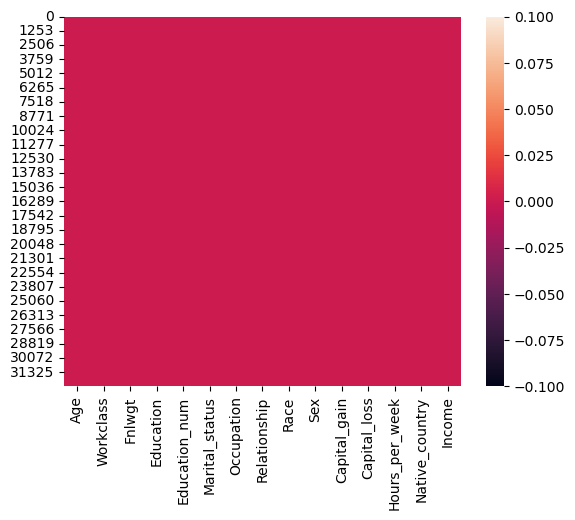

In [19]:
sns.heatmap(df.isnull())

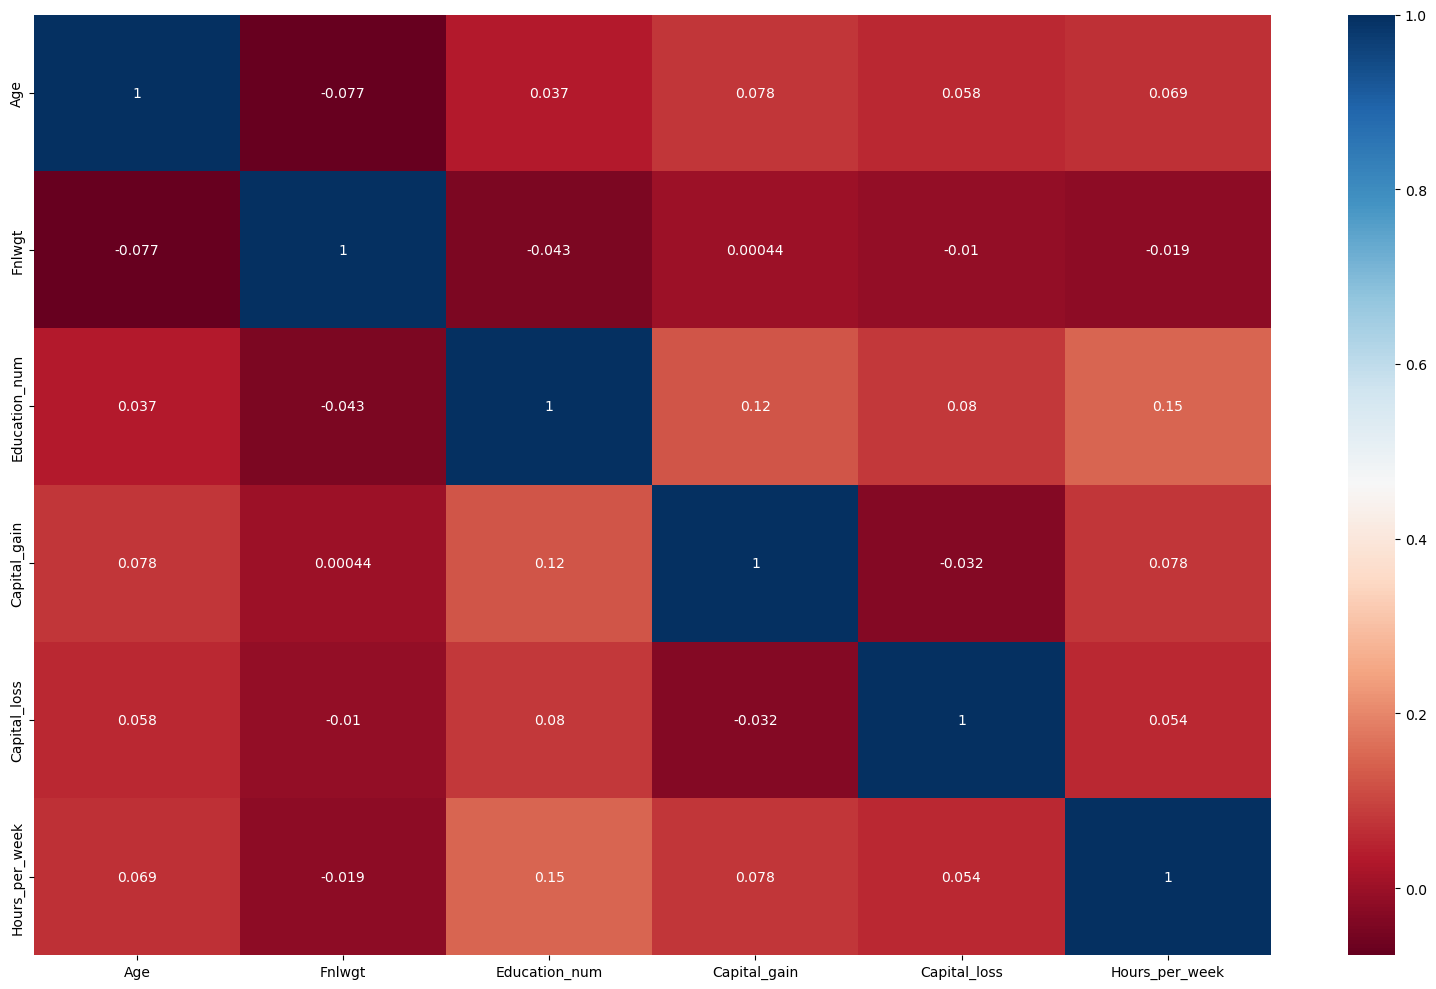

In [20]:
# Correlation Matrix
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap='RdBu', annot=True)
plt.tight_layout()

<Axes: xlabel='Income', ylabel='count'>

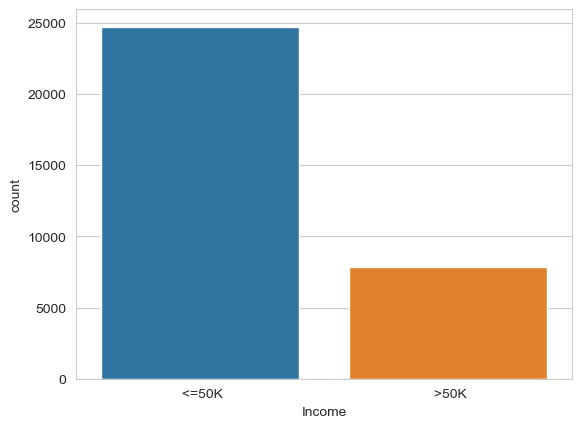

In [21]:
sns.set_style("whitegrid")
sns.countplot(x="Income",data=df)

<Axes: xlabel='Hours_per_week', ylabel='count'>

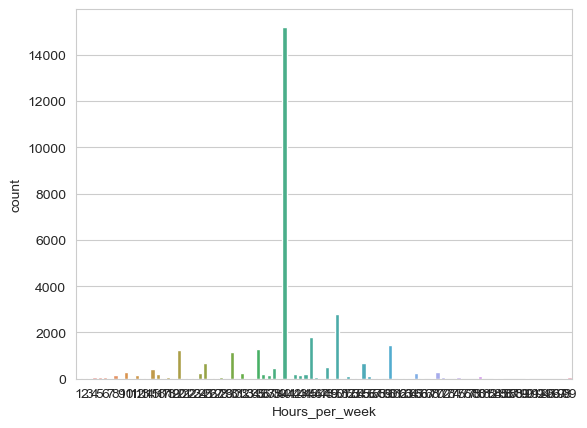

In [22]:
sns.set_style("whitegrid")
sns.countplot(x="Hours_per_week",data=df)

In [23]:
df=df.drop_duplicates()
print("Rows and column after droping duplicate:",df.shape)

Rows and column after droping duplicate: (32536, 15)


<Axes: >

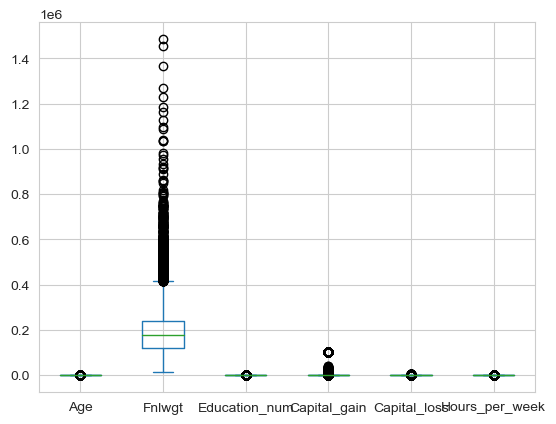

In [24]:
df.plot.box()

Age                  Axes(0.125,0.53;0.110714x0.35)
Fnlwgt            Axes(0.257857,0.53;0.110714x0.35)
Education_num     Axes(0.390714,0.53;0.110714x0.35)
Capital_gain      Axes(0.523571,0.53;0.110714x0.35)
Capital_loss      Axes(0.656429,0.53;0.110714x0.35)
Hours_per_week    Axes(0.789286,0.53;0.110714x0.35)
dtype: object

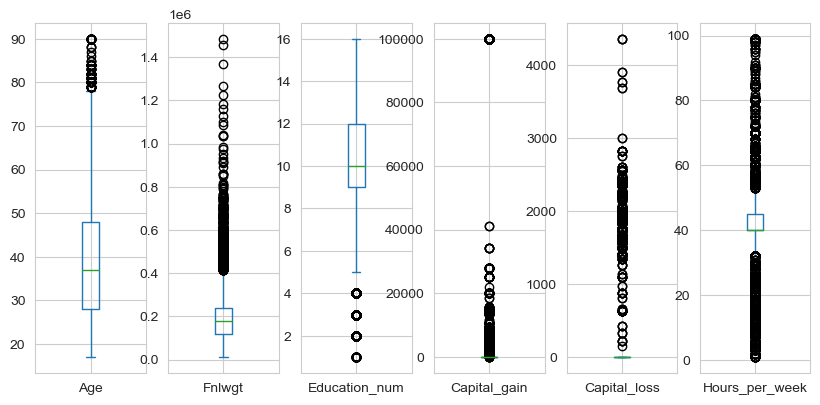

In [25]:
df.plot(kind="box",subplots=True,layout=(2,6),figsize=(10,10))

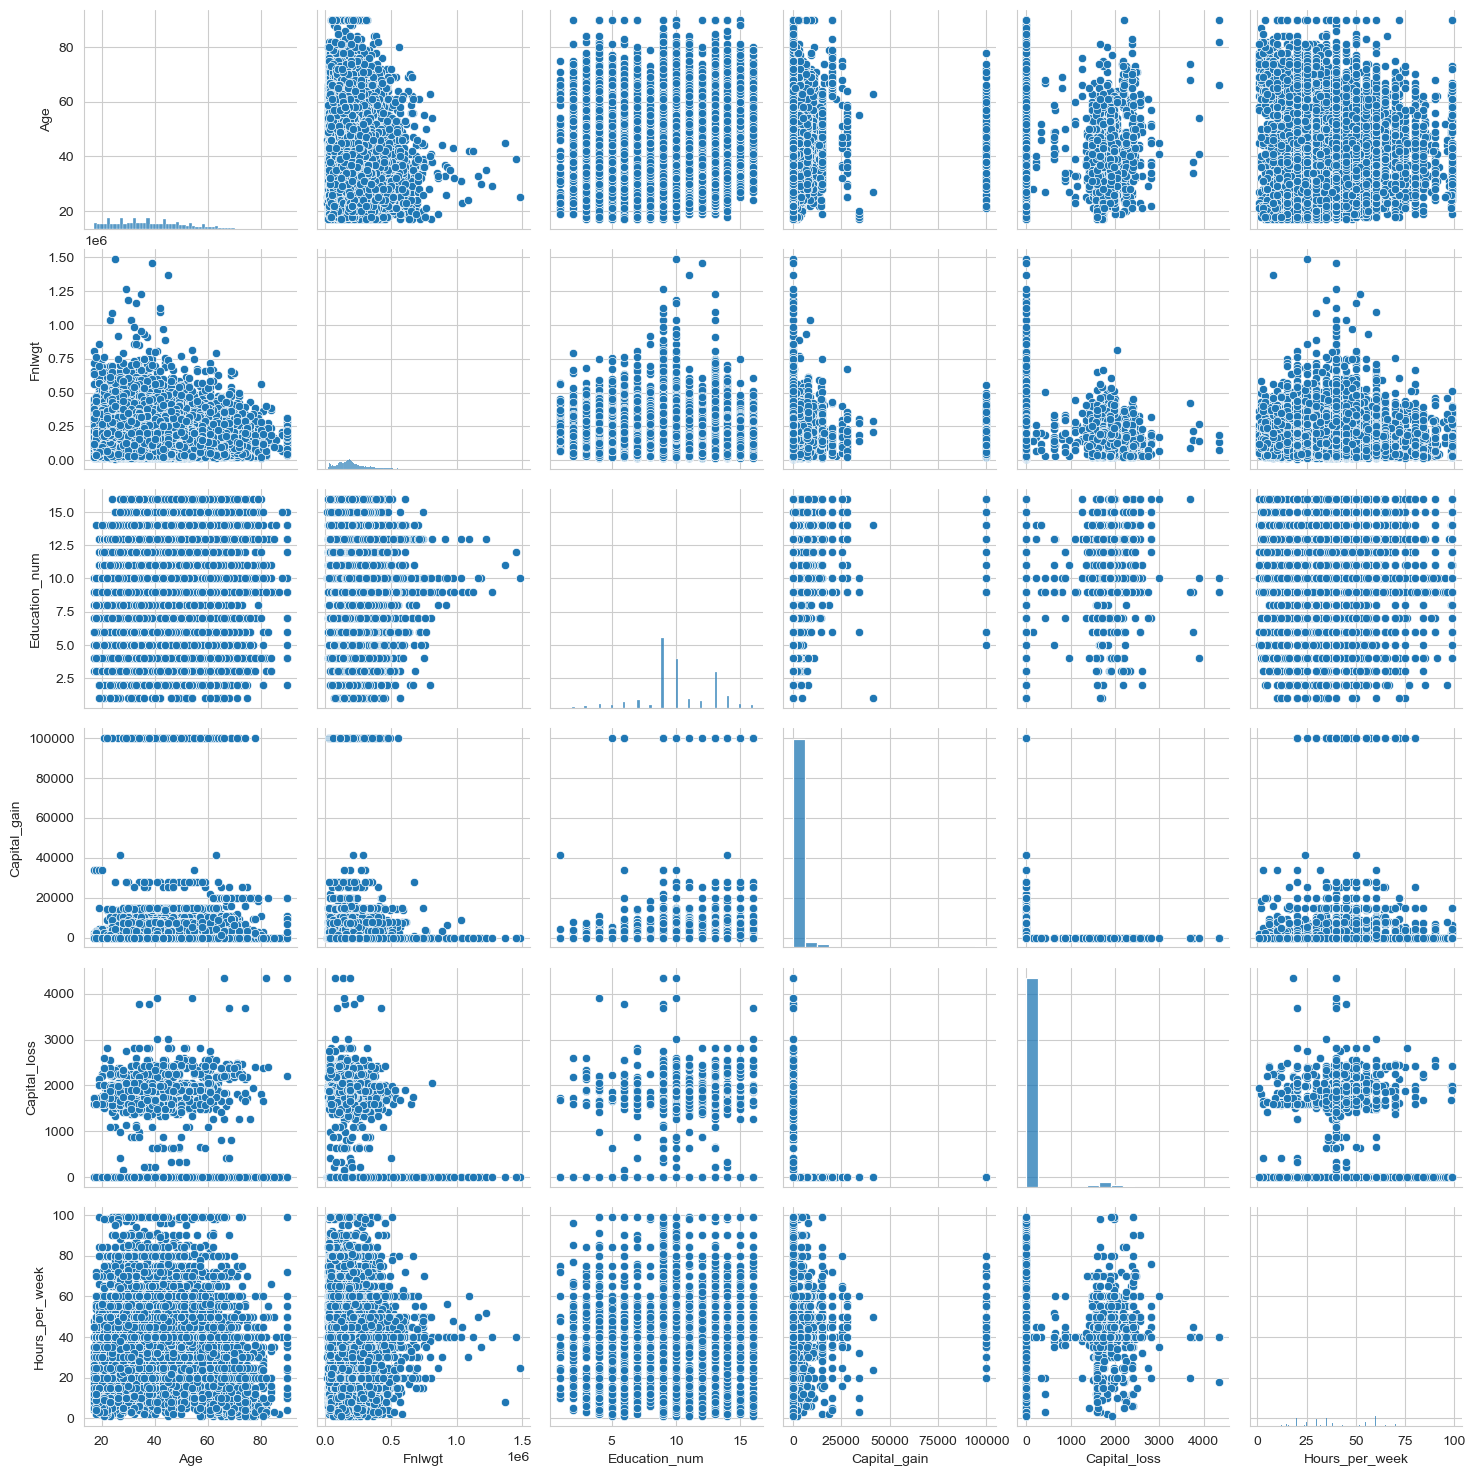

In [26]:
sns.pairplot(df)

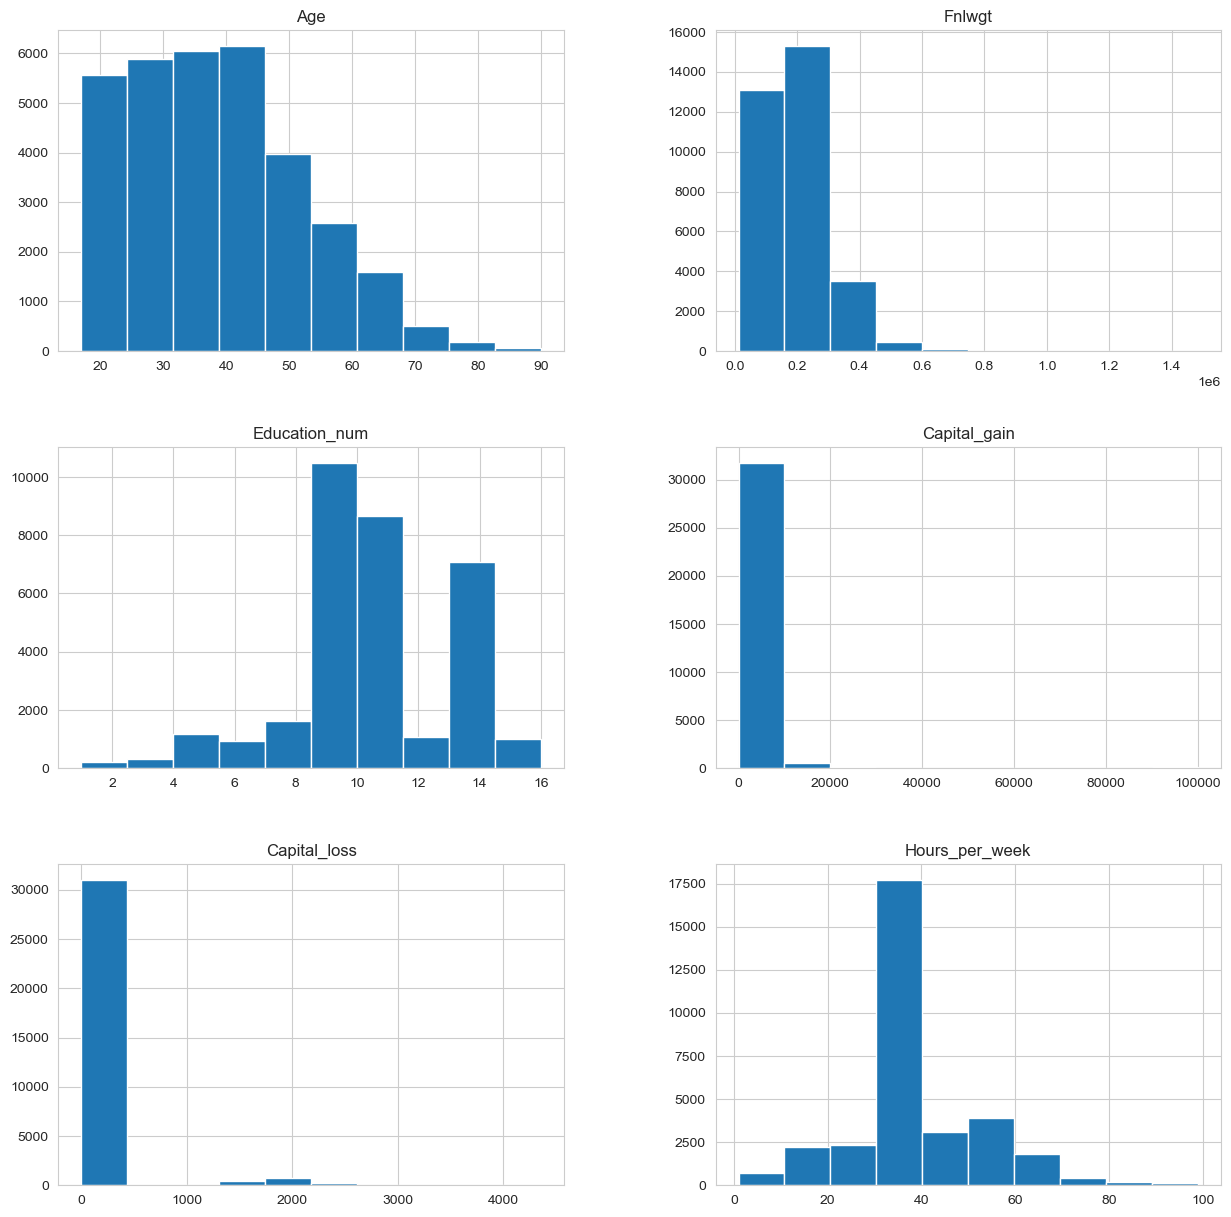

In [27]:
df.hist(figsize=(15,15))
plt.show()

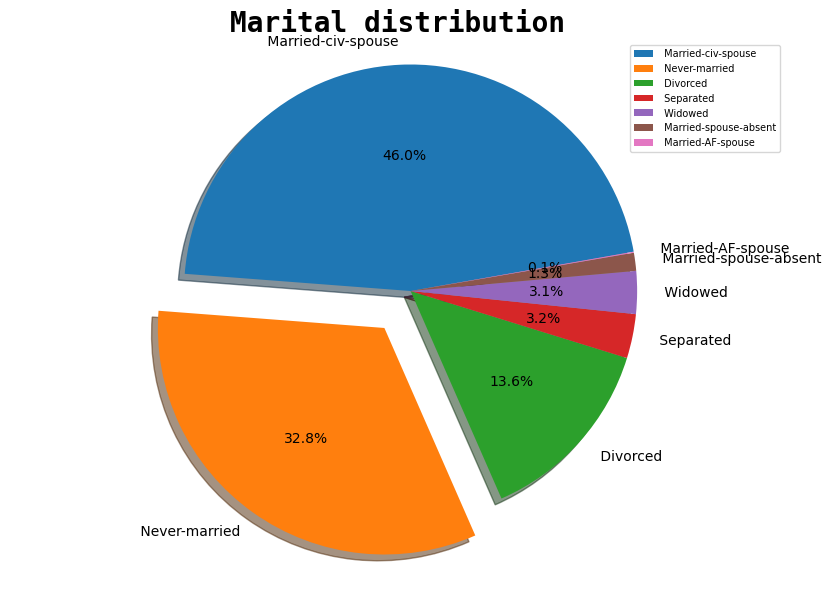

In [28]:
# Creating a pie chart for 'Marital status'
marital = df['Marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

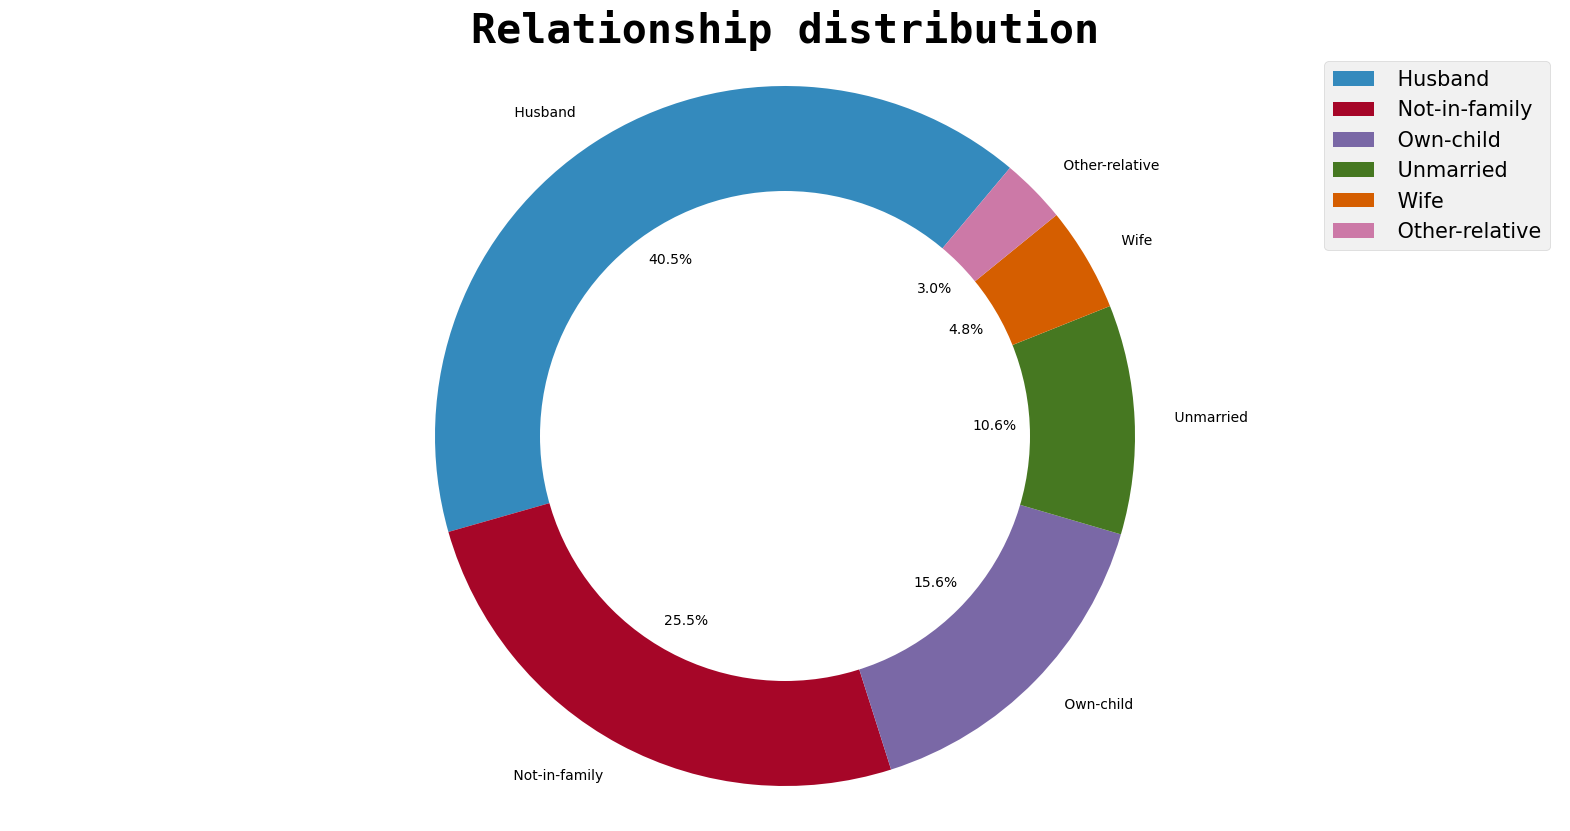

In [29]:
# Creating a donut chart for 'Age'
relation = df['Relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [30]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



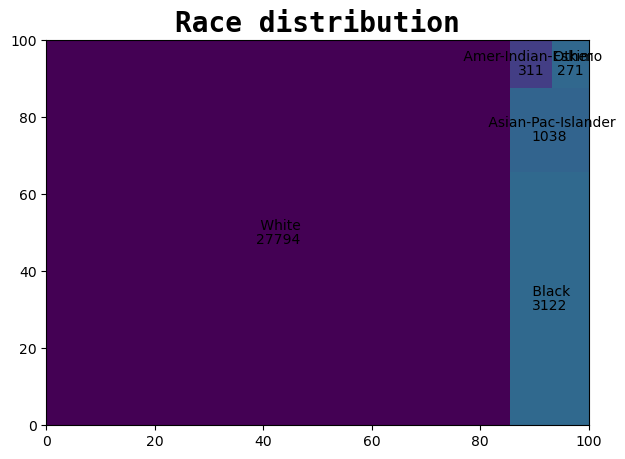

In [31]:
# Creating a Treemap for 'Race'
import squarify
race = df['Race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

<Axes: >

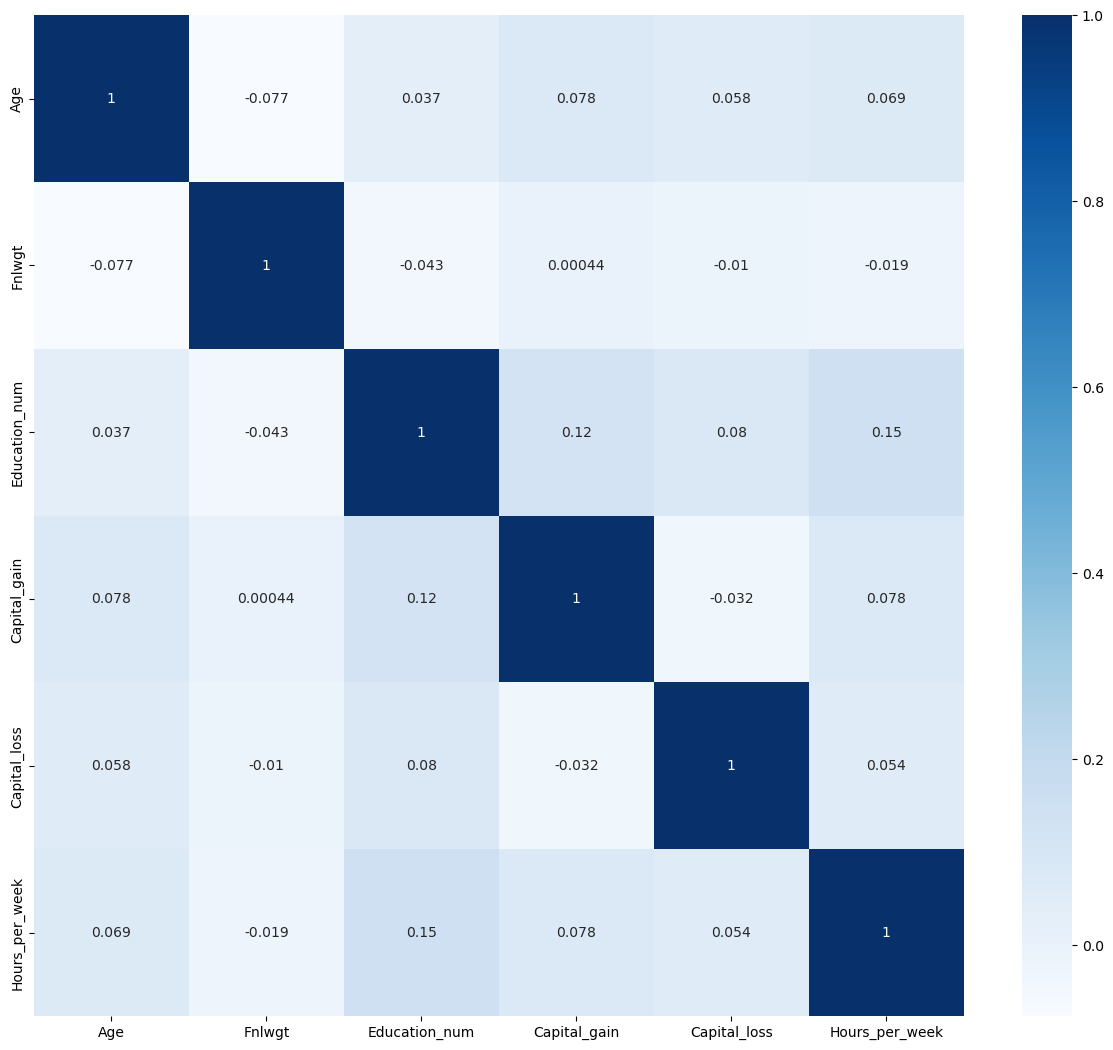

In [32]:
plt.figure(figsize=(15,13))
sns.heatmap(dfcor,cmap="Blues",annot=True)

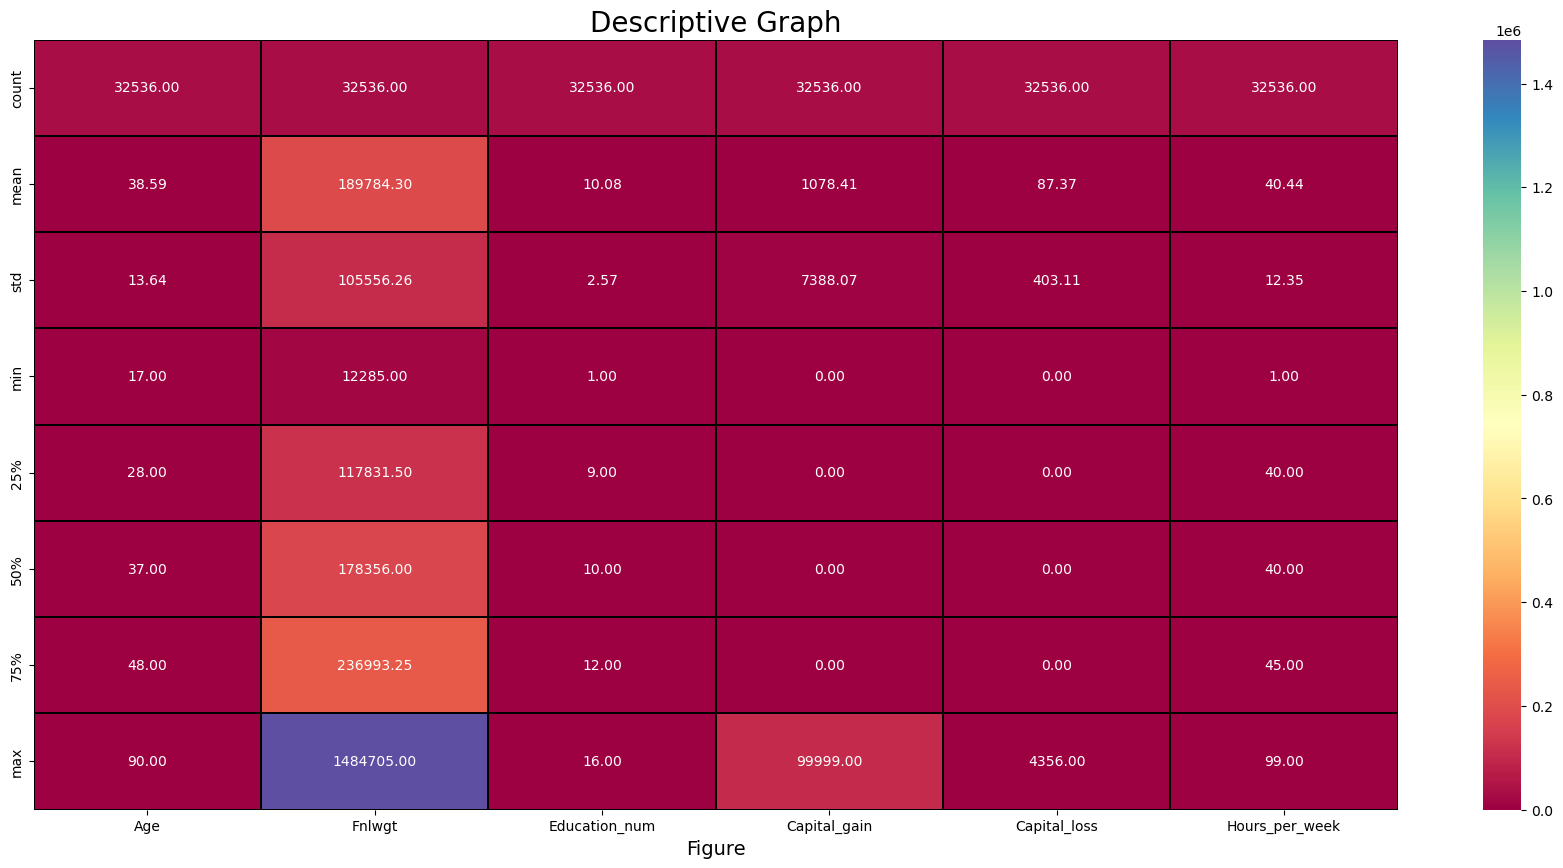

In [33]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Figure",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

In [34]:
categorical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="O":
        categorical_cols.append(x)
print(f"object data type columns are:\n",categorical_cols)

numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="float64" or df.dtypes[x]=="int64":
        numerical_cols.append(x)
print(f"\nNumber Data Types Columns are:\n",numerical_cols)

object data type columns are:
 ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

Number Data Types Columns are:
 ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


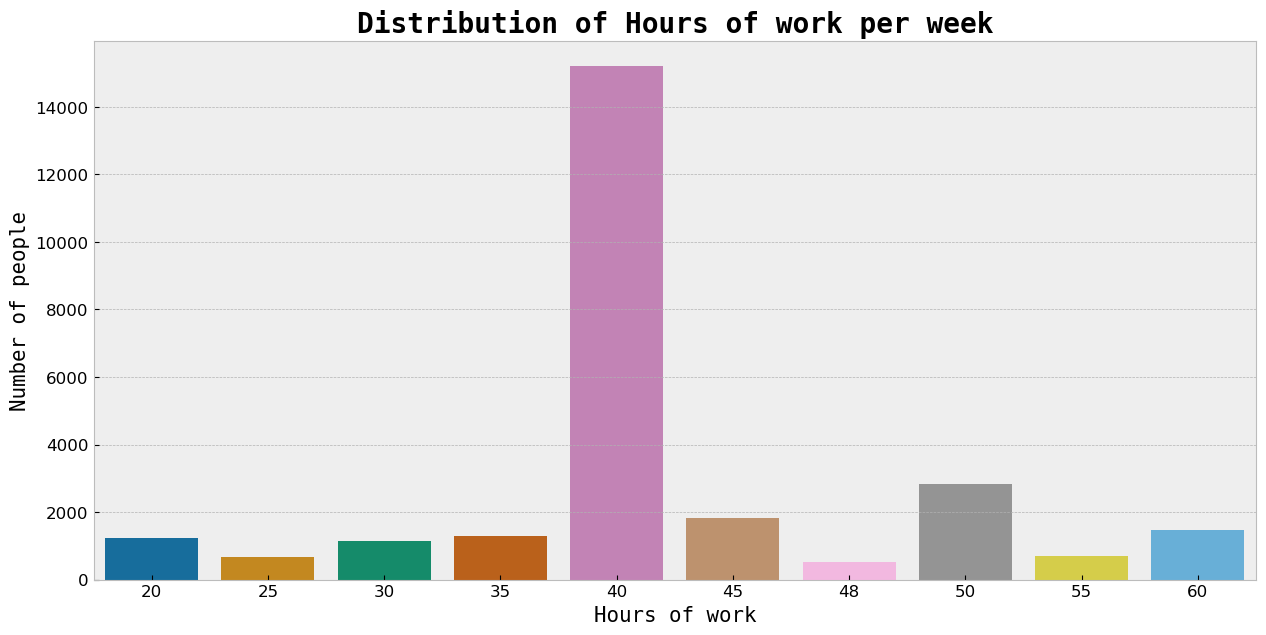

In [35]:
# Creating a barplot for 'Hours per week'
HPK = df['Hours_per_week'].value_counts().head(10).reset_index()

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(x='index', y='Hours_per_week',data=HPK, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

<Axes: xlabel='Fnlwgt', ylabel='count'>

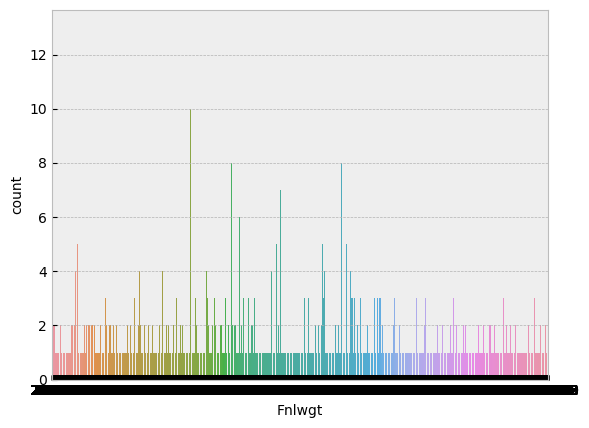

In [36]:
sns.countplot(x="Fnlwgt",data=df)

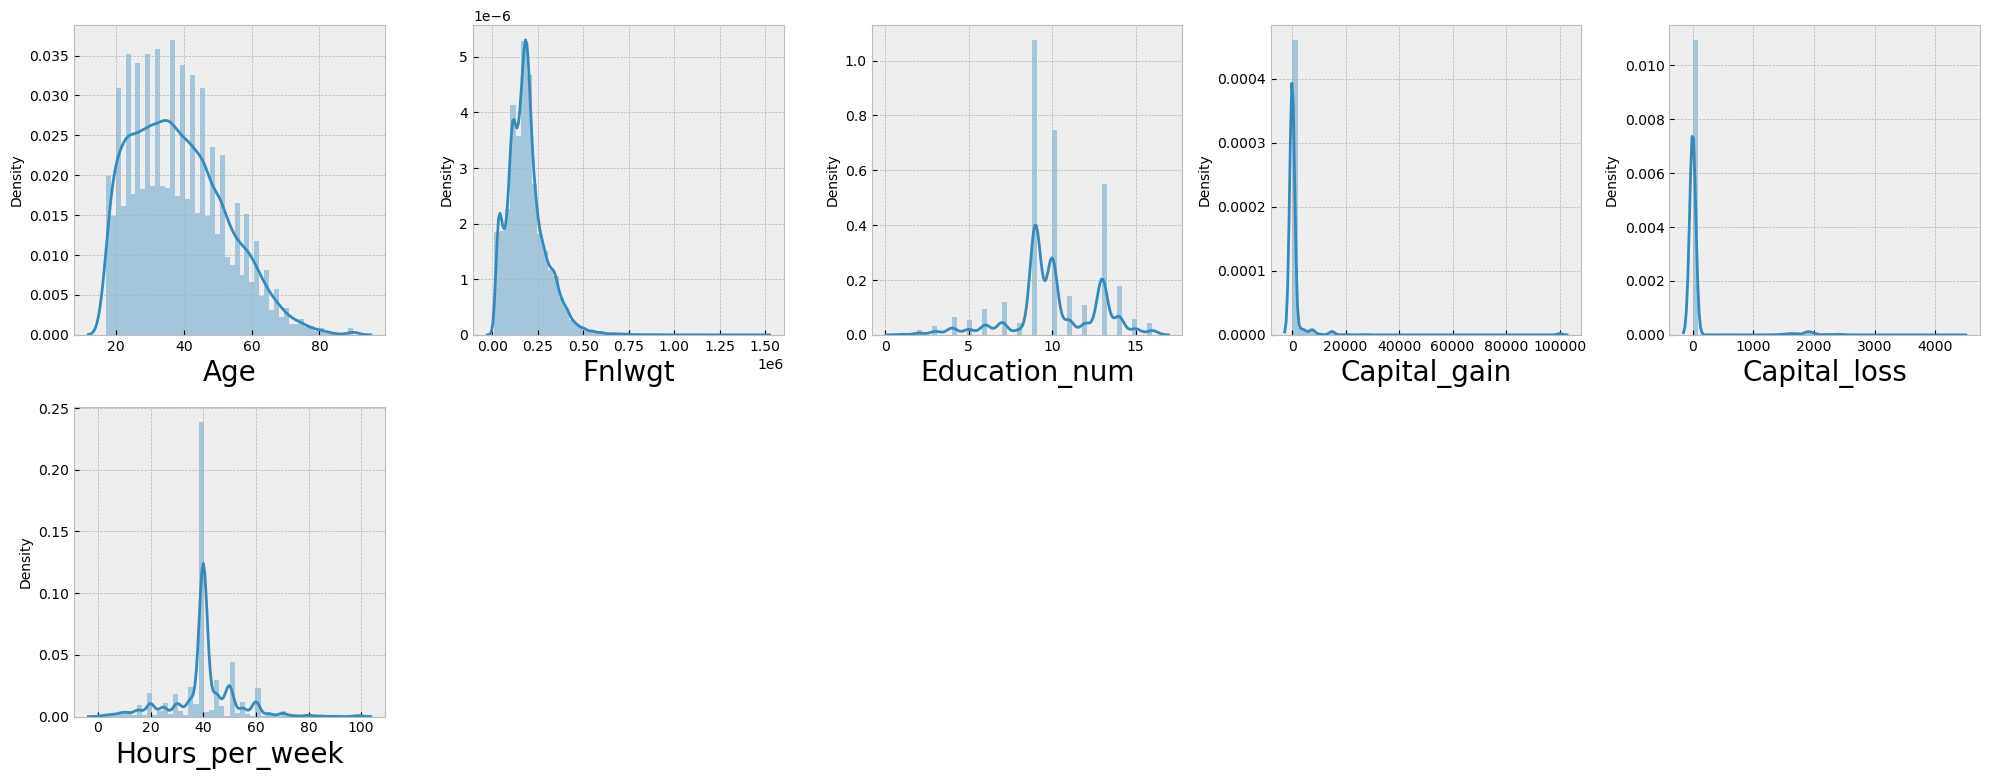

In [37]:
plt.figure(figsize=(20,15),facecolor="white")
plot_number=1
for column in df[numerical_cols]:
    if plot_number<=20:
        ax=plt.subplot(4,5,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_number +=1
plt.tight_layout()

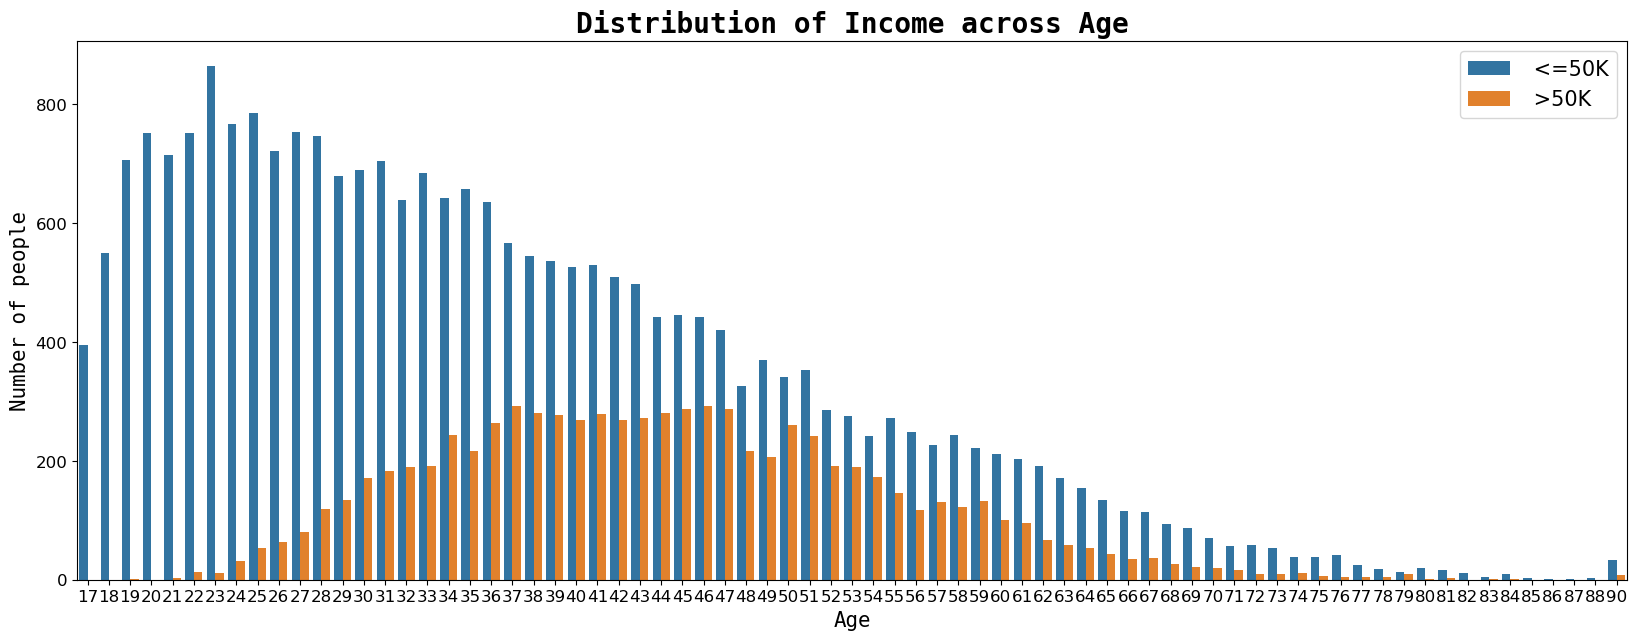

In [38]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['Age'], hue=df['Income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

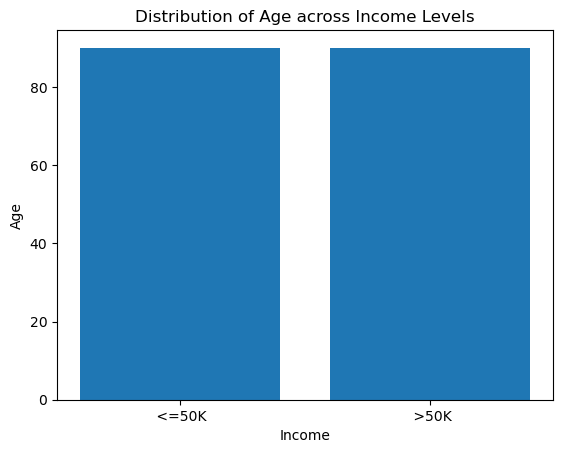

In [39]:
plt.bar(df["Income"], df["Age"])
plt.title("Distribution of Age across Income Levels")
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

<Axes: xlabel='Age', ylabel='count'>

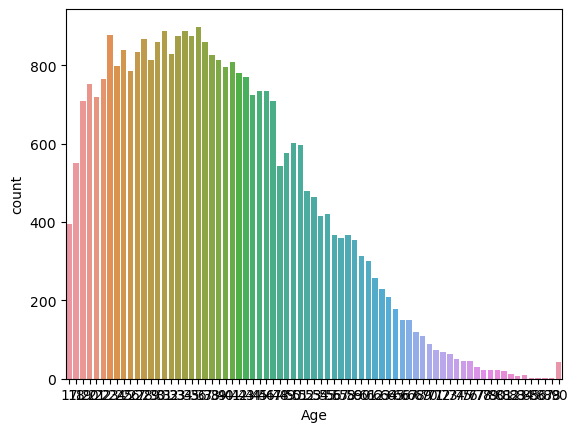

In [40]:
sns.countplot(x="Age",data=df)

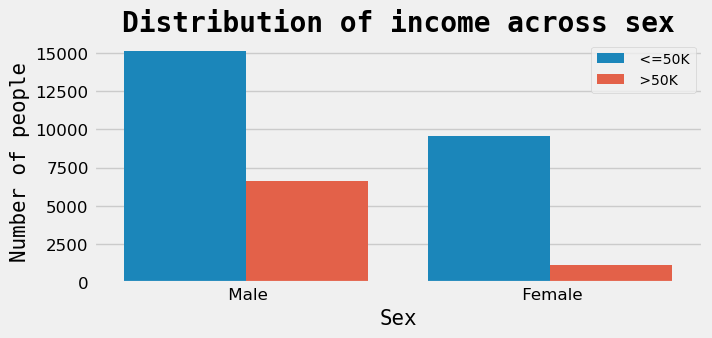

In [41]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(x=df['Sex'], hue=df['Income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.show()

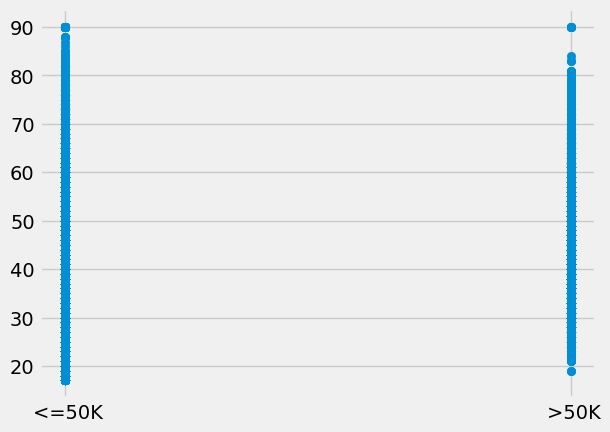

In [42]:
plt.scatter(x="Income",y="Age",data=df)

# Data Preprocessing

In [43]:
df=df.replace("?",np.nan)

In [44]:
df=df.fillna(0)

In [45]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [47]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [48]:
df=df.replace("",np.nan)
df=df.fillna(0)

In [49]:
x=df.drop("Income",axis=1)
y=df["Income"]

In [50]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [51]:
x,y=sm.fit_resample(x,y)

In [52]:
y.value_counts()

0    24697
1    24697
Name: Income, dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [54]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.77867252,  1.60021398, -1.01570248, ..., -0.25658391,
        -2.52671865,  0.30169733],
       [-0.18955605,  0.13485058,  0.26132018, ..., -0.25658391,
        -0.17598616,  0.30169733],
       [ 1.02072966,  0.13485058,  0.44539247, ..., -0.25658391,
        -0.17598616,  0.30169733],
       ...,
       [-0.27024177,  0.13485058, -0.26464892, ..., -0.25658391,
        -0.088922  ,  0.30169733],
       [ 0.53661538,  0.13485058, -0.45407692, ..., -0.25658391,
         0.78171967,  0.30169733],
       [-0.91572748, -2.79587624,  1.75873744, ...,  3.91232906,
         0.08520634,  0.30169733]])

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [57]:
print("Size of x_train :",x_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of x_train :",y_train.shape)
print("Size of x_train :",y_test.shape)

Size of x_train : (39515, 14)
Size of x_test : (9879, 14)
Size of x_train : (39515,)
Size of x_train : (9879,)


In [58]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(826):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
print("Best score:",maxAcc)
print("Random State:",rs)

Best score: 0.7876518218623482
Random State: 189


In [59]:
def classify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=826)
    
    #training the model
    clf.fit(x_train,y_train)
    
    #predicting Y_Test
    pred=clf.predict(x_test)
    
    #Accuracy Score
    acc_score =(accuracy_score(y_test,pred))
    print ("Accuracy Score:",acc_score)
    
    #confusion matrix:
    print("confusion matrix:\n",confusion_matrix(y_test,pred))
    
    #classification report
    class_report=classification_report(y_test,pred)
    print("\nClassification Report:\n",class_report)
    
    #cross validation score
    cv_score =(cross_val_score(clf,x,y,cv=5).mean())
    print("Cross Validation Score:",cv_score)
    
    #result of accuracy minus cv scores
    result=acc_score-cv_score
    print("\nAccuracy Score - Cross Validation Score is ",result)

In [60]:
clf=LogisticRegression()
classify(clf,x,y)

Accuracy Score: 0.7611336032388664
confusion matrix:
 [[1889  605]
 [ 575 1871]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76      2494
           1       0.76      0.76      0.76      2446

    accuracy                           0.76      4940
   macro avg       0.76      0.76      0.76      4940
weighted avg       0.76      0.76      0.76      4940

Cross Validation Score: 0.7673201027021002

Accuracy Score - Cross Validation Score is  -0.006186499463233797


In [61]:
clf=DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.8645748987854251
confusion matrix:
 [[2144  350]
 [ 319 2127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      2494
           1       0.86      0.87      0.86      2446

    accuracy                           0.86      4940
   macro avg       0.86      0.86      0.86      4940
weighted avg       0.86      0.86      0.86      4940

Cross Validation Score: 0.8467636535302511

Accuracy Score - Cross Validation Score is  0.01781124525517408


In [62]:
clf=RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.9012145748987854
confusion matrix:
 [[2255  239]
 [ 249 2197]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      2494
           1       0.90      0.90      0.90      2446

    accuracy                           0.90      4940
   macro avg       0.90      0.90      0.90      4940
weighted avg       0.90      0.90      0.90      4940

Cross Validation Score: 0.8854930772900793

Accuracy Score - Cross Validation Score is  0.015721497608706114


In [63]:
clf=SVC()
classify(clf,x,y)

Accuracy Score: 0.861336032388664
confusion matrix:
 [[2082  412]
 [ 273 2173]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      2494
           1       0.84      0.89      0.86      2446

    accuracy                           0.86      4940
   macro avg       0.86      0.86      0.86      4940
weighted avg       0.86      0.86      0.86      4940

Cross Validation Score: 0.8505896115215201

Accuracy Score - Cross Validation Score is  0.010746420867143835


In [64]:
clf=KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score: 0.8572874493927125
confusion matrix:
 [[2101  393]
 [ 312 2134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      2494
           1       0.84      0.87      0.86      2446

    accuracy                           0.86      4940
   macro avg       0.86      0.86      0.86      4940
weighted avg       0.86      0.86      0.86      4940

Cross Validation Score: 0.8489296638341957

Accuracy Score - Cross Validation Score is  0.00835778555851685


In [65]:
clf=GradientBoostingClassifier()
classify(clf,x,y)

Accuracy Score: 0.8813765182186235
confusion matrix:
 [[2185  309]
 [ 277 2169]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      2494
           1       0.88      0.89      0.88      2446

    accuracy                           0.88      4940
   macro avg       0.88      0.88      0.88      4940
weighted avg       0.88      0.88      0.88      4940

Cross Validation Score: 0.8692763753422896

Accuracy Score - Cross Validation Score is  0.012100142876333875


In [66]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
model.predict(x_test)

array([1, 0, 1, ..., 0, 1, 1])

In [68]:
model.score(x_test,y_test)

0.8961538461538462

In [69]:
model.predict_proba(x_test)

array([[0.  , 1.  ],
       [0.9 , 0.1 ],
       [0.02, 0.98],
       ...,
       [0.99, 0.01],
       [0.01, 0.99],
       [0.09, 0.91]])

In [70]:
rf=RandomForestClassifier(max_samples=0.75,random_state=420)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred))
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Accuracy Score: 0.8993927125506073
Confusion Matrix
 [[2238  245]
 [ 252 2205]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      2483
           1       0.90      0.90      0.90      2457

    accuracy                           0.90      4940
   macro avg       0.90      0.90      0.90      4940
weighted avg       0.90      0.90      0.90      4940



#Hyper Parameter 

In [71]:
from sklearn.model_selection import GridSearchCV 

In [72]:
#Number of trees in random forest
n_estimators=[20,60,100,120]
#Number of features to consider at every split
max_features=[0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth=[2,8,None]

#Number of samples
max_samples=[0.5,0.75,1.0]

In [73]:
param_grid={"n_estimators":n_estimators,
           "max_features":max_features,
           "max_depth":max_depth,
           "max_samples":max_samples
           }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [74]:
rf=RandomForestClassifier()

In [75]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=5,verbose=2,
                    n_jobs=-1)

In [76]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [77]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.75,
 'n_estimators': 120}

In [78]:
rf_grid.best_score_

0.8930130632220067

In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

#The ROC curve is useful for comparing and selecting models based on their performance. A model with a curve closer to the top-left corner (where TPR is high and FPR is low) indicates better performance. An ideal classifier would have a ROC curve that goes straight up to the top-left corner and then straight across to the top-right corner, forming a right angle.

Text(0.5, 0, 'False Positive Rate')

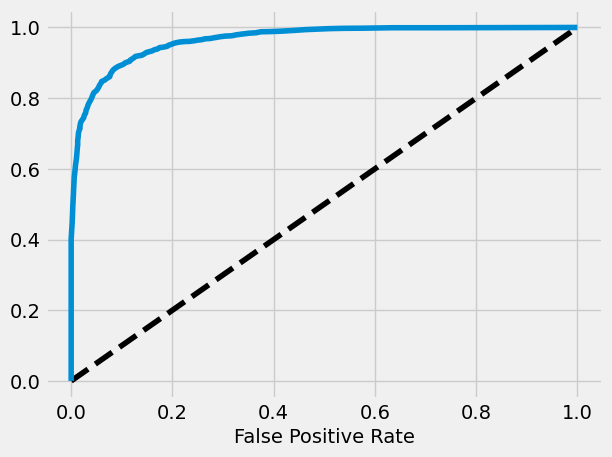

In [80]:
#predicting the probability of having 1 in the x-test
rf.fit(x_train, y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("False Positive Rate")

# Save Model In Pickle

In [81]:
import pickle

In [82]:
filename="Censuses income project.pkl"

In [83]:
pickle.dump(rf,open(filename,"wb"))

In [84]:
loaded_model=pickle.load(open("Censuses income project.pkl","rb"))

In [85]:
result=loaded_model.score(x_test,y_test)

In [86]:
print(result*100)

89.63562753036437


In [87]:
#conclusion
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Origional"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4930,4931,4932,4933,4934,4935,4936,4937,4938,4939
Predicted,1,0,1,0,0,0,0,1,0,1,...,0,1,1,1,1,1,1,0,1,1
Origional,1,0,1,0,0,0,0,1,0,1,...,0,1,1,1,1,1,1,0,1,1


In [88]:
print(x_test)

[[ 0.85935824  0.86753228 -0.45690435 ... -0.25658391  2.17474633
   0.30169733]
 [ 1.34347252 -2.06319454 -1.61095802 ... -0.25658391 -0.17598616
   0.30169733]
 [-0.18955605  0.13485058 -0.74376763 ... -0.25658391  0.6946555
   0.30169733]
 ...
 [-1.31915606  0.13485058 -0.64898608 ... -0.25658391  0.6946555
   0.30169733]
 [ 0.1331868   0.13485058 -0.00745915 ... -0.25658391  0.78171967
  -4.46420958]
 [ 0.61730109  0.13485058  5.55986168 ... -0.25658391 -0.088922
   0.30169733]]


In [89]:
print(y_test)

46212    1
12851    0
46609    1
12307    0
3968     0
        ..
46386    1
38272    1
870      0
48797    1
48903    1
Name: Income, Length: 4940, dtype: int32
